In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline


In [4]:
print(cv2.__version__)

4.1.2


In [5]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [6]:
path = "./images/image1.jpg"
image = cv2.imread(path)


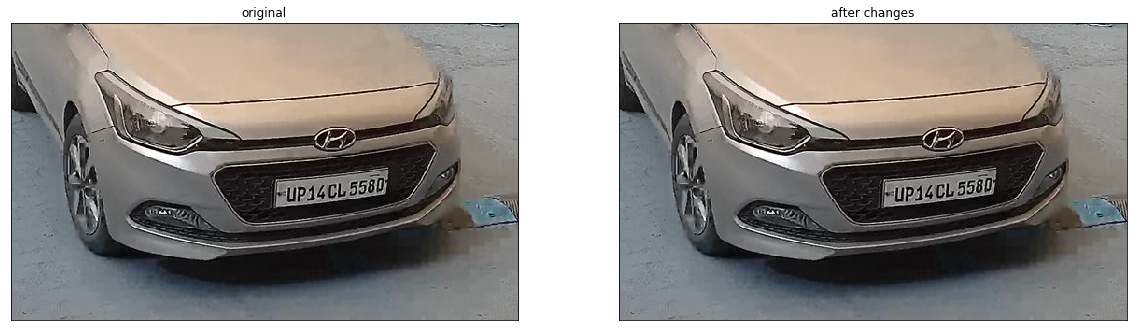

In [7]:
plot_images(image, image, title1="original", title2="after changes")

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

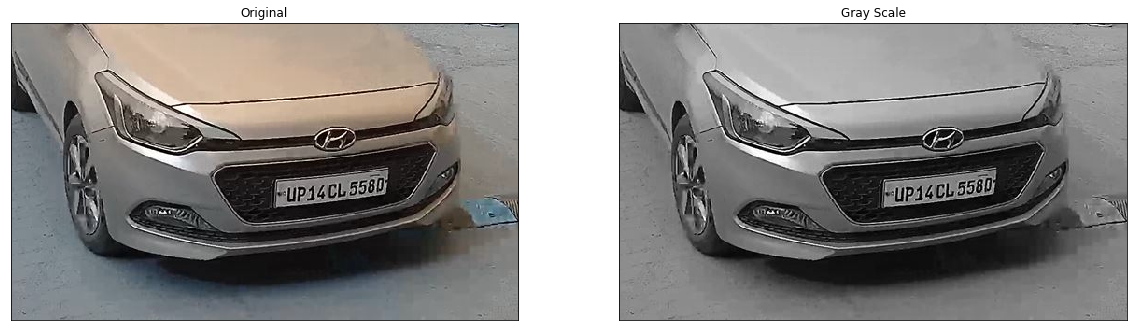

In [9]:
plot_images(image, gray, title1="Original", title2="Gray Scale")


In [10]:
blur = cv2.bilateralFilter(gray, 9, 75, 75)

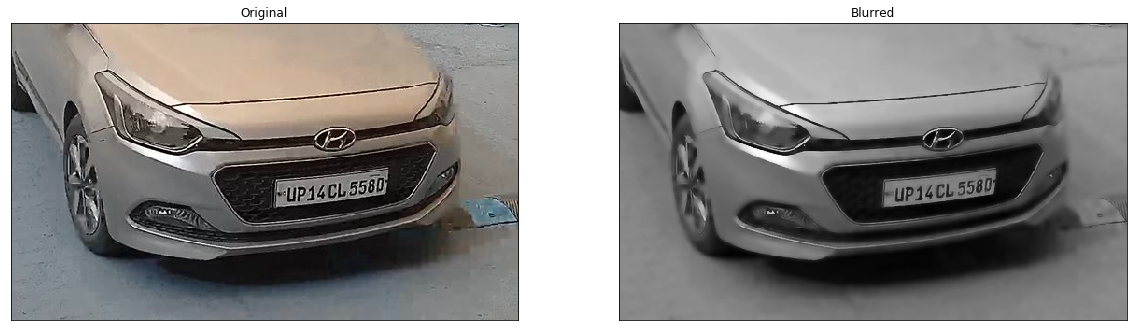

In [11]:
plot_images(image, blur, title1="Original", title2="Blurred")

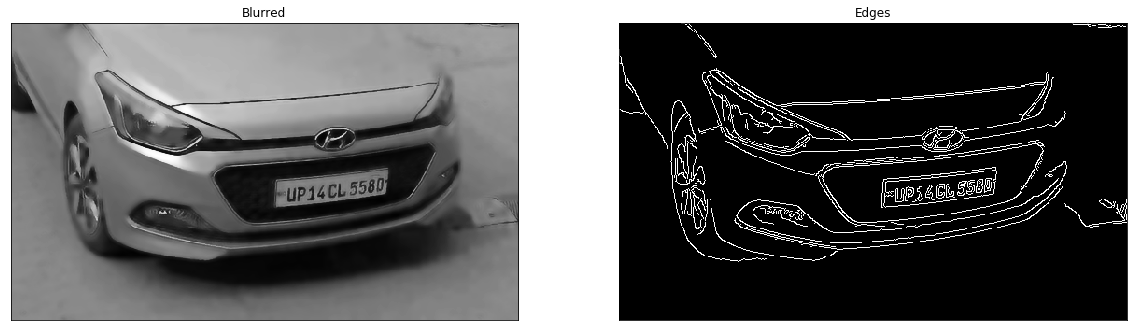

In [12]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges, title1="Blurred", title2="Edges")

In [13]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
image_copy = image.copy()

In [15]:
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 2)

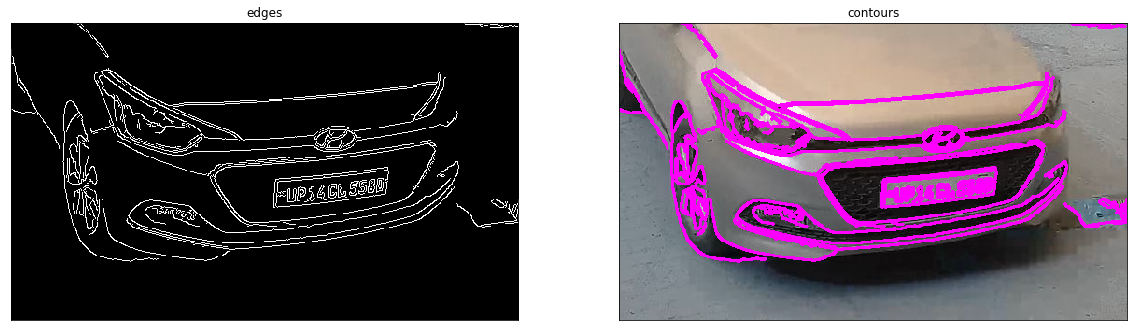

In [16]:
plot_images(edges, image_copy, title1="edges", title2="contours")

In [17]:
print(len(cnts))

150


In [18]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]


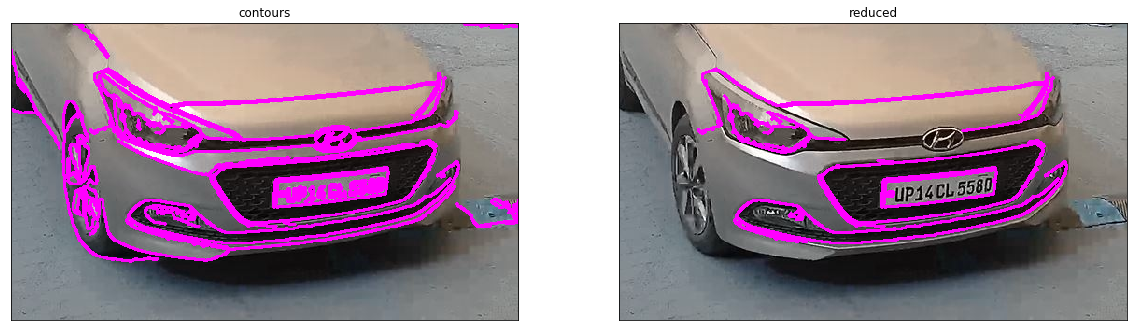

In [19]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255, 0, 255), 2)
plot_images(image_copy, image_reduced_cnts, title1="contours", title2="reduced")

In [20]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite('plate.png', plate)

True

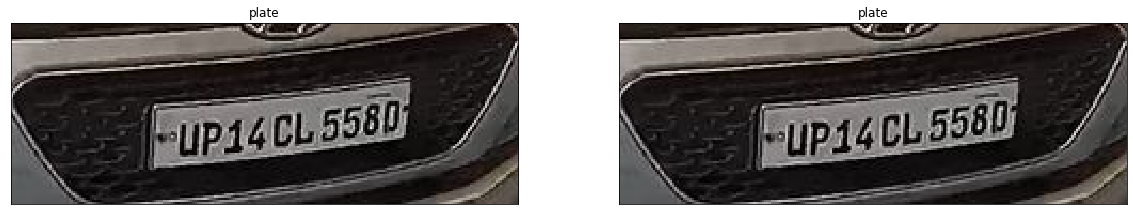

In [21]:
plot_images(plate, plate, title1="plate", title2="plate")